In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_mldata

# Import data

In [2]:
mnist = fetch_mldata('MNIST original')

In [4]:
def get_img(i):
    return np.reshape(mnist.data[i], (28, 28))


def show(img):
    plt.imshow(img, cmap='gray')

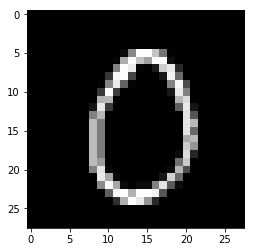

In [5]:
show(get_img(23))

# Defining kernels

In [6]:
kernelV = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

kernelH = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

img = get_img(23)

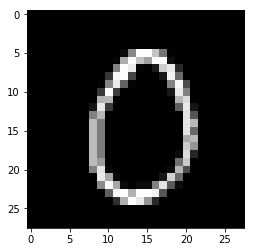

In [7]:
show(img)

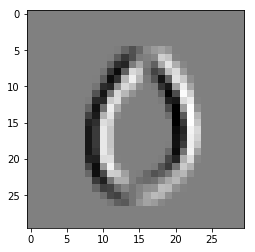

In [8]:
convolved = signal.convolve2d(img, kernelV)
a = np.min(convolved)
b = np.max(convolved)
show(convolved - a / (b - a))

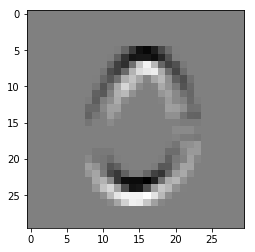

In [9]:
convolved = signal.convolve2d(img, kernelH)
a = np.min(convolved)
b = np.max(convolved)
show(convolved - a / (b - a))

# Random kernels

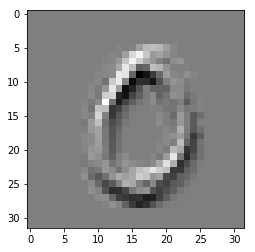

In [10]:
kernel = np.random.randint(-255, 255, size=(5, 5))
convolved = signal.convolve2d(img, kernel)
a = np.min(convolved)
b = np.max(convolved)
show(convolved - a / (b - a))

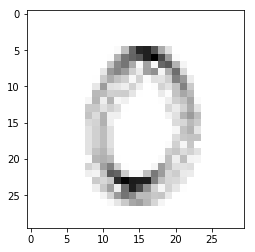

In [11]:
kernel = np.random.randint(-255, 255, size=(3, 3))
convolved = 255 - np.absolute(signal.convolve2d(img, kernel))
b = np.max(convolved)
show(convolved / b)

# Commutative property

In [12]:
convolved1 = signal.convolve2d(kernelV, img)
convolved2 = signal.convolve2d(img, kernelV)
np.min(np.equal(convolved1, convolved2))

True

In [13]:
kernel = np.random.randint(-255, 255, size=(5, 5))

convolved1 = signal.convolve2d(kernel, img)
convolved2 = signal.convolve2d(img, kernel)
np.min(np.equal(convolved1, convolved2))

True

# Kernel scale

In [14]:
kernel = np.random.randint(-255, 255, size=(5, 5))

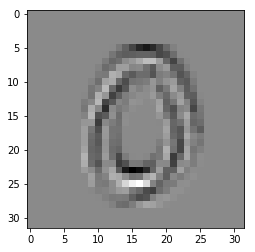

In [39]:
convolved = signal.convolve2d(img, 1.*kernel)
a = np.min(convolved)
b = np.max(convolved)
show(convolved - a / (b - a))

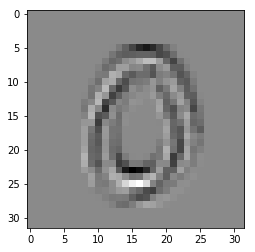

In [40]:
convolved_scaled = signal.convolve2d(img, 0.1*kernel)
a = np.min(convolved)
b = np.max(convolved)
show(convolved - a / (b - a))

In [41]:
10 * convolved_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
np.min(np.equal(convolved, 10*convolved_scaled))

False

# Ant

In [72]:
img_ant = cv2.imread('data/ant.jpg', 0)

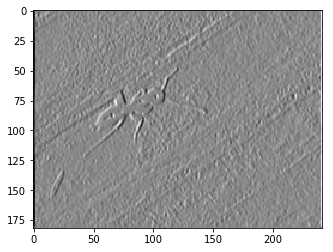

In [76]:
convolved = signal.convolve2d(img_ant, kernelV)
a = np.min(convolved)
b = np.max(convolved)
show(convolved - a / (b - a))

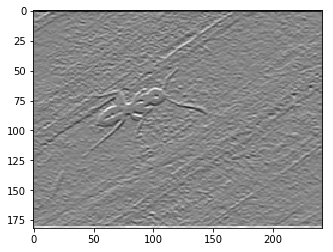

In [77]:
convolved = signal.convolve2d(img_ant, kernelH)
a = np.min(convolved)
b = np.max(convolved)
show(convolved - a / (b - a))

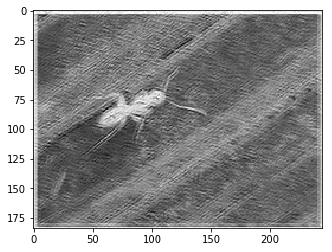

In [135]:
kernel = np.random.randint(-255, 255, size=(5, 5))
convolved = np.absolute(signal.convolve2d(img_ant, kernel))
b = np.max(convolved)
show(255 * (b - convolved))

In [87]:
for x in range(10):
    print(x)

0
1
2
3
4
5
6
7
8
9
